# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
# To Run my agent:
# Run the import torch cell below
# The from unityagents cell
# brain name cell
# runAgent cell
# cell after that calls runAgent

In [2]:
import torch
print(torch.__version__)
!pip -q install ./python

0.4.0a0+3749c58
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: Could not find a version that satisfies the requirement torch==0.4.0 (from unityagents) (from versions: 1.0.0, 1.0.1, 1.1.0, 1.2.0, 1.3.0, 1.3.1, 1.4.0, 1.5.0, 1.5.1, 1.6.0, 1.7.0, 1.7.1, 1.8.0, 1.8.1, 1.9.0, 1.9.1, 1.10.0, 1.10.1, 1.10.2)
ERROR: No matching distribution found for torch==0.4.0


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [3]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="Banana_Linux_NoVis/Banana.x86_64")
#env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [5]:
from collections import deque
from dqnAgent import Agent

def runAgent(numEpisodes, maxSteps, epsStart, epsEnd, epsDecay):
    """
    Run the Deep Q-Network agent
    ============================
    numEpisodes: number of episodes to run
    maxSteps: maximum number of timesteps to take per episode
    epsStart: starting value for epsilon
    epsEnd: minimum value for epsilon
    epsDecay: epsilon decay rate
    """
    
    # Initialize score containers
    scoreList = []
    last100Scores = deque(maxlen=100)
    
    # Initialize epsilon learning rate
    epsilon = epsStart
    
    # Create agent
    env_info = env.reset(train_mode=True)[brain_name]
    state_size = len(env_info.vector_observations[0])
    action_size = brain.vector_action_space_size
    agent = Agent(state_size, action_size, seed=0)
    
    # Begin training
    for episodeNum in range(1, numEpisodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        score = 0
        
        for stepNum in range(maxSteps):
            # Get the current agent state from the environment
            state = env_info.vector_observations[0]
            # Take an action given the current state
            action = agent.act(state, epsilon)
            # Use the action to step in the environment
            env_info = env.step(action)[brain_name]
            # Get the next state
            nextState = env_info.vector_observations[0]
            # Get the reward
            reward = env_info.rewards[0]
            # Check if done
            done = env_info.local_done[0]
            # Provide the data to the agent for learning
            agent.step(state, action, reward, nextState, done)
            
            state = nextState
            score += reward
            if done:
                break
        scoreList.append(score)
        last100Scores.append(score)
        
        # Update epsilon value
        epsilon = max(epsEnd, epsilon*epsDecay)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(episodeNum, np.mean(last100Scores)), end="")
        
        if episodeNum % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(episodeNum, np.mean(last100Scores)))
            
        if np.mean(last100Scores)>=14.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episodeNum-100, np.mean(last100Scores)))
            torch.save(agent.QNet_Local.state_dict(), 'checkpoint_ddqn.pth')
            break
    return scoreList

In [6]:
numEpisodes = 5000
maxSteps = 500
epsStart = 0.999
epsEnd = 0.01
epsDecay = 0.995
scores = runAgent(numEpisodes, maxSteps, epsStart, epsEnd, epsDecay)

Episode 100	Average Score: 0.33
Episode 200	Average Score: 1.47
Episode 300	Average Score: 3.89
Episode 400	Average Score: 5.12
Episode 500	Average Score: 6.87
Episode 600	Average Score: 8.97
Episode 700	Average Score: 10.13
Episode 800	Average Score: 11.42
Episode 900	Average Score: 12.17
Episode 1000	Average Score: 12.43
Episode 1100	Average Score: 13.17
Episode 1200	Average Score: 12.35
Episode 1300	Average Score: 12.32
Episode 1400	Average Score: 12.51
Episode 1500	Average Score: 12.48
Episode 1600	Average Score: 12.65
Episode 1700	Average Score: 13.07
Episode 1800	Average Score: 11.93
Episode 1900	Average Score: 12.88
Episode 2000	Average Score: 13.81
Episode 2033	Average Score: 14.02
Environment solved in 1933 episodes!	Average Score: 14.02


In [9]:
def plot_result(scores):
    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.title('Training Scores', fontsize=22)
    plt.ylabel('Score', fontsize=18)
    plt.xlabel('Episode #', fontsize=18)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    plt.savefig('Training Scores.png')
    plt.show()

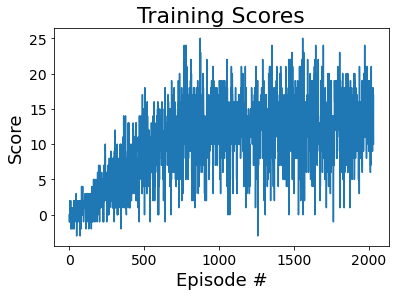

In [10]:
import matplotlib.pyplot as plt
plot_result(scores)